<a href="https://colab.research.google.com/github/vatiza/Machine_Learning/blob/main/Classification(UNSQ_NB15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⏳Task 1:** Do classification upon the following
UNSW-NB15 (UNSQ-NB15)

---





#**The UNSW-NB15 Dataset**
The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of UNSW Canberra for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. The tcpdump tool was utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label. These features are described in UNSW-NB15_features.csv file.

The total number of records is two million and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_2.csv, UNSW-NB15_3.csv and UNSW-NB15_4.csv.
The ground truth table is named UNSW-NB15_GT.csv and the list of event file is called UNSW-NB15_LIST_EVENTS.csv.
A partition from this dataset was configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively. The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal. \
[***The UNSW-NB15 Dataset***](https://research.unsw.edu.au/projects/unsw-nb15-dataset)


----



Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



# modeling imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#---------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, roc_curve, accuracy_score, auc, confusion_matrix
from prettytable import PrettyTable

%matplotlib inline

**Function**

In [3]:
def false_alarm_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)
    FNR = fn / (fn + tp)
    return (FPR+FNR)/2

def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):

    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']

    # Training te best model
    clf.fit(x_train, y_train)
    # prediction on train data
    y_train_pred = clf.predict(x_train)
     # prediction on test data
    y_test_pred = clf.predict(x_test)

    # roc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)

    # scorestest
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)

    #show   resultin table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'Recall', 'Percision','False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_recall, train_precision, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1,test_recall, test_precision, test_far])
    print(x)

    #    Accuracy
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()




    # TrainConfusion_matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")


    # TestConfusion_matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
   xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()

    # Returning scores of test data
    return clf, test_auc, test_f1, test_far, test_recall, test_precision

# **DaataSet Mount from gdrive**




In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/The UNSW-NB15 Dataset/ClassificationData/UNSW_NB15_training-set.csv')
train.head()
#test dataset=('/content/drive/MyDrive/Colab Notebooks/The UNSW-NB15 Dataset/ClassificationData/UNSW_NB15_testing-set.csv')


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
df_numeric = train.select_dtypes(include=np.number)
df_numeric.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [6]:
X = df_numeric.iloc[:,1:-1]
y = df_numeric.iloc[:, -1]

**Split data train and test**

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=52, stratify=y)

# **LogisticRegrassion Model**
It uses the logistic function to transform the linear combination of variables into a probability value between 0 and 1.

***Accuracy***

 Train  |  0.7623565120754744

  Test  |  0.7588202618042024

+---------+-------+--------------------+--------------------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |       Recall       |     Percision      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+--------------------+--------------------+---------------------+
|  Train  |   lr  | 0.7586680816630447 | 0.7433357460448764 | 0.6607595867495129 | 0.8494989601058801 | 0.24133191833695528 |
|   Test  |   lr  | 0.758834281532401  | 0.7418188618088886 | 0.6563172117134506 | 0.8529348527198451 | 0.24116571846759904 |
+---------+-------+--------------------+--------------------+--------------------+--------------------+---------------------+


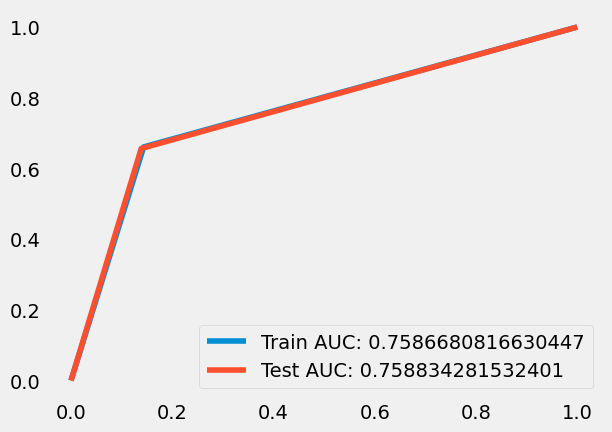

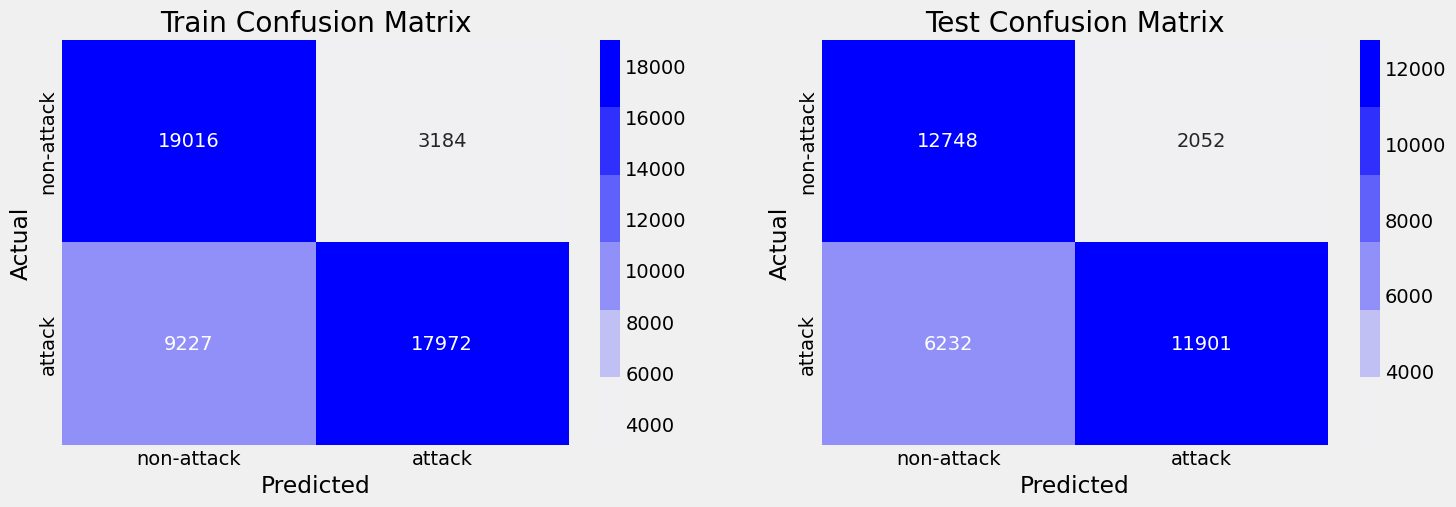

(LogisticRegression(),
 0.758834281532401,
 0.7418188618088886,
 0.24116571846759904,
 0.6563172117134506,
 0.8529348527198451)

In [8]:
lr = LogisticRegression()
evaluate_result(lr, X_train, y_train, X_val, y_val, "lr")

# **Decision Tree**
The decision tree algorithm learns from training data to make predictions by following a series of decisions based on the input features.
***Accuracy***


 Train |  0.9999684860708433 **(Max)**

 Test  |  0.96390268945416

+---------+---------------+--------------------+--------------------+--------------------+-------------------+-----------------------+
| Dataset |     Model     |        AUC         |      F1-score      |       Recall       |     Percision     |    False Alarm Rate   |
+---------+---------------+--------------------+--------------------+--------------------+-------------------+-----------------------+
|  Train  | Decision Tree | 0.9999816169712121 | 0.9999816166332702 | 0.9999632339424244 |        1.0        | 1.838302878782308e-05 |
|   Test  | Decision Tree | 0.9640209577580668 | 0.9675442954131479 | 0.9666905641647825 | 0.968399535937241 |   0.0359790422419331  |
+---------+---------------+--------------------+--------------------+--------------------+-------------------+-----------------------+


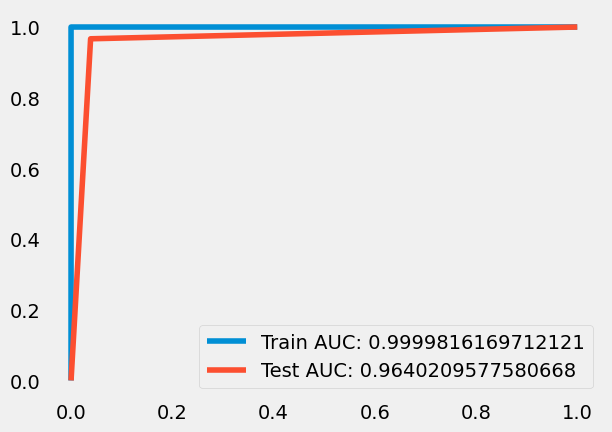

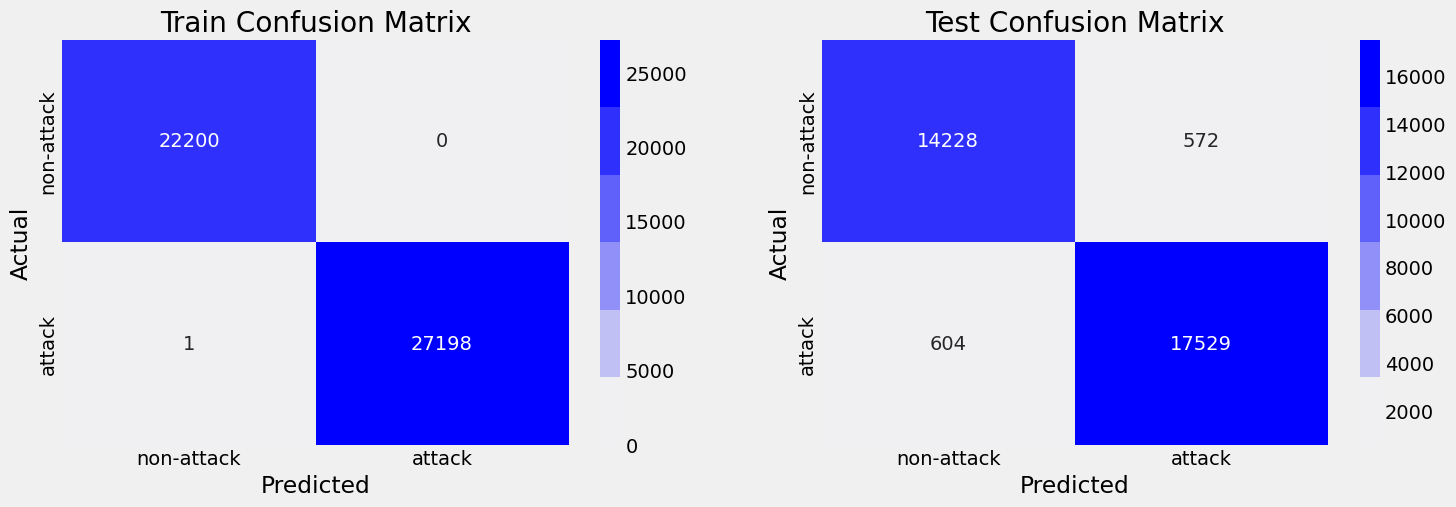

(DecisionTreeClassifier(),
 0.9640209577580668,
 0.9675442954131479,
 0.0359790422419331,
 0.9666905641647825,
 0.968399535937241)

In [9]:
dt= DecisionTreeClassifier()
evaluate_result(dt,X_train,y_train,X_val,y_val,"Decision Tree")

# **Random Forest**
 that uses an ensemble of decision trees to make predictions. It combines multiple decision trees, each trained on different subsets of the data, and aggregates their predictions to produce a final prediction.

 ***Accuracy***


 Train |  0.9799236754537397

 Test  |  0.9651371224165342 **(Max)**

+---------+---------------+--------------------+--------------------+--------------------+--------------------+----------------------+
| Dataset |     Model     |        AUC         |      F1-score      |       Recall       |     Percision      |   False Alarm Rate   |
+---------+---------------+--------------------+--------------------+--------------------+--------------------+----------------------+
|  Train  | Random Forest | 0.9770523426106352 | 0.9795288890520866 | 0.9807713518879371 | 0.9782895701921667 | 0.022947657389364808 |
|   Test  | Random Forest | 0.9619713107057313 | 0.9657303680812318 | 0.9650912700601114 | 0.9663703131039815 | 0.03802868929426863  |
+---------+---------------+--------------------+--------------------+--------------------+--------------------+----------------------+


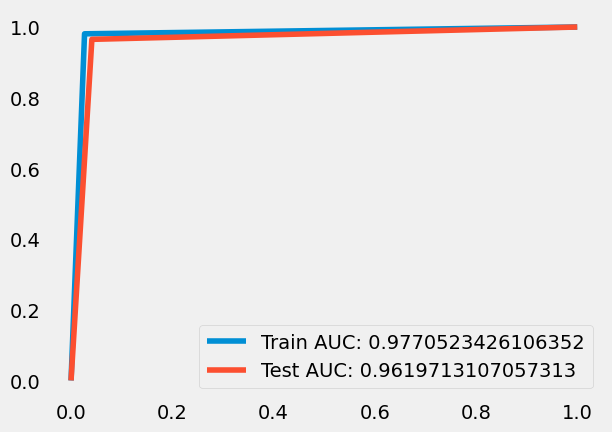

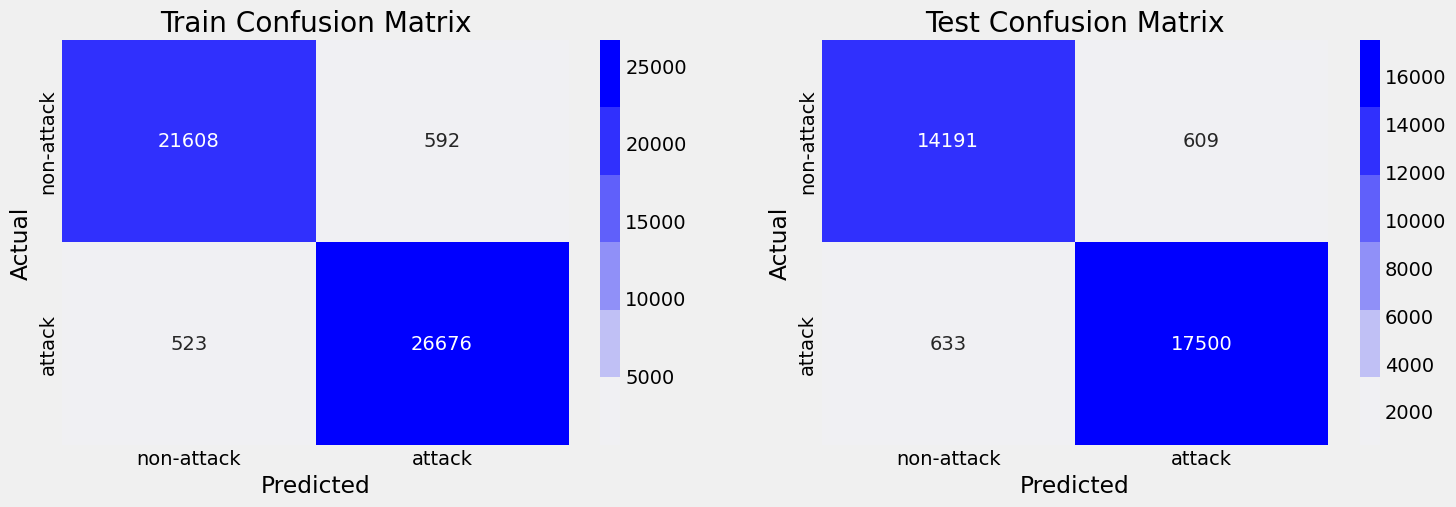

(RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=5,
                        min_samples_split=12),
 0.9619713107057313,
 0.9657303680812318,
 0.03802868929426863,
 0.9650912700601114,
 0.9663703131039815)

In [10]:
rf= RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=5,min_samples_split=12)
evaluate_result(rf,X_train,y_train,X_val,y_val,"Random Forest")

⛑ we are working with UNSW_NB15_training-set this dataset cleared  and have applied some methods there.

# use
DecisionClassifier,LogisticRegression,RandomForestClissifier

**Random Forest** Classifier Provide **Maximum** Test Accuracy Value.
**Decision tree** Classification provice **Maximum** Train Accuracy value.


# **Add new  KNeighborsClassifier  Model**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)
y_pred = knn_bin.predict(X_val)

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_val, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_val, y_pred)*100)
print("Accuracy - ",accuracy_score(y_val,y_pred)*100)


Mean Absolute Error -  0.19263352867944009
Mean Squared Error -  0.19263352867944009
Root Mean Squared Error -  0.4389003630431856
R2 Score -  22.26856962295113
Accuracy -  80.73664713205599
